In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
print ("Setup complete")

Setup complete


In [2]:
df_train = pd.read_csv("train.csv")

# EXPLORATORY DATA ANALYSIS

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Description

## Numeric Feature

* Age
* SibSp
* Fare

## Ordinal Feature

* PClass

## Nominal Feature

* Embarked
* Cabin

## Binary Feature

* Survived
* Sex

## Useless feature

* PassengerId **(Id)**
* Name **(Text)**
* Ticket **(Id)**


In [5]:
'''
Setting the Pclass as string
also removing the high cardinal features of name and PassengerID
'''

df_train.Pclass = df_train['Pclass'].astype(str)
df_train.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
print (df_train.shape)
print ("\nMissing value proportion\n")
for (col, x) in zip(df_train.columns, df_train.isnull().sum()):
    print (col + " => ",  x, " => ", x / df_train.shape[0])

(891, 10)

Missing value proportion

Survived =>  0  =>  0.0
Pclass =>  0  =>  0.0
Sex =>  0  =>  0.0
Age =>  177  =>  0.19865319865319866
SibSp =>  0  =>  0.0
Parch =>  0  =>  0.0
Ticket =>  0  =>  0.0
Fare =>  0  =>  0.0
Cabin =>  687  =>  0.7710437710437711
Embarked =>  2  =>  0.002244668911335578


<AxesSubplot:>

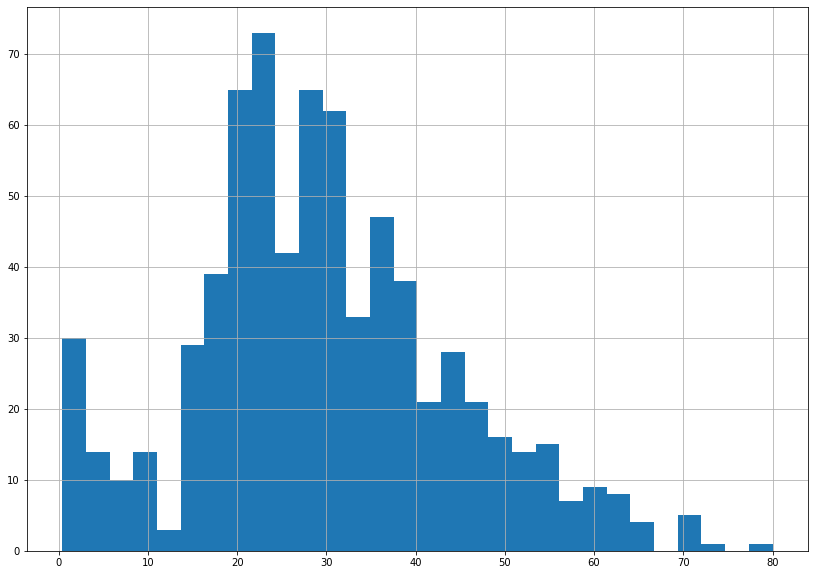

In [7]:
plt.figure(figsize=(14, 10))
df_train['Age'].hist(bins = 30)

<AxesSubplot:>

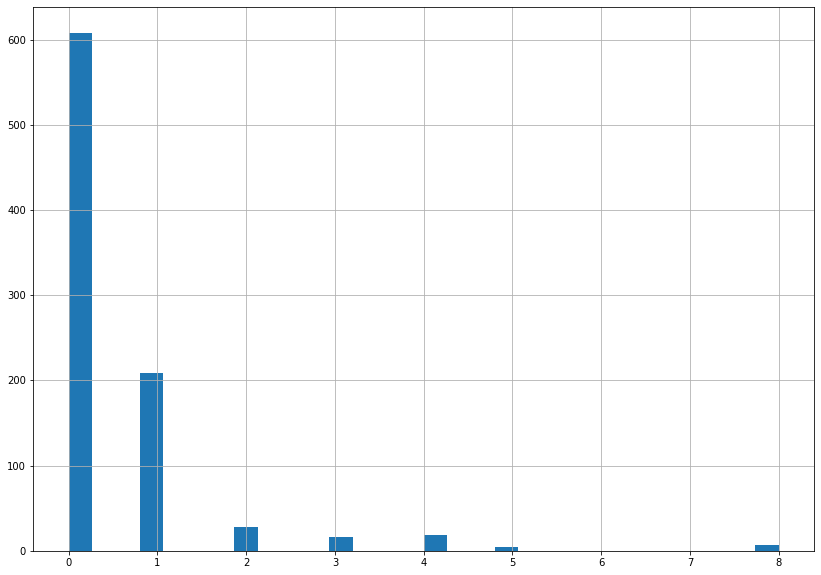

In [8]:
plt.figure(figsize=(14, 10))
df_train['SibSp'].hist(bins = 30)

<AxesSubplot:>

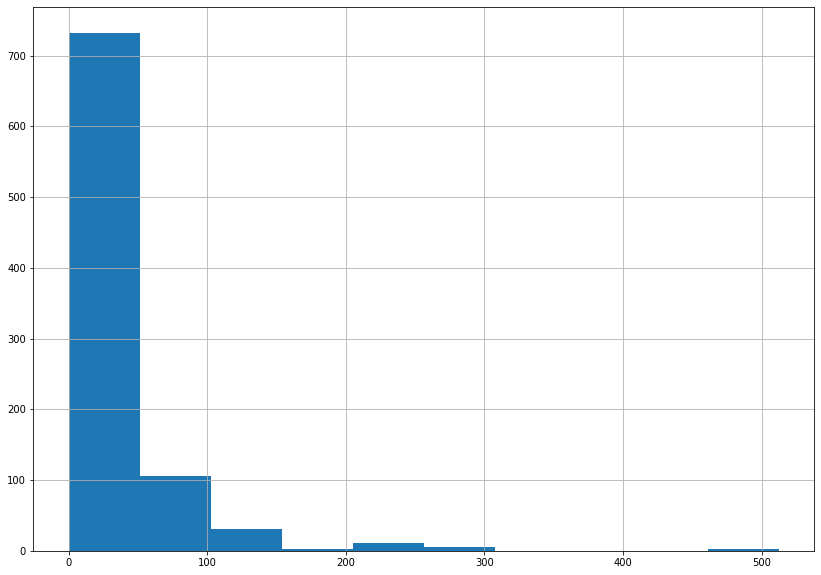

In [9]:
plt.figure(figsize=(14, 10))
df_train['Fare'].hist()

In [10]:
'''
	Assumption:- 
		pandas is imported as pd
'''

def heatMap (data : pd.DataFrame) -> None:
	corrmat = data.corr()
	top_corr_features = corrmat.index
	plt.figure (figsize = (20, 20))
	g = sns.heatmap (
		data[top_corr_features].corr(), annot = True,
		cmap = "RdYlGn")
	plt.show()
	plt.clf()


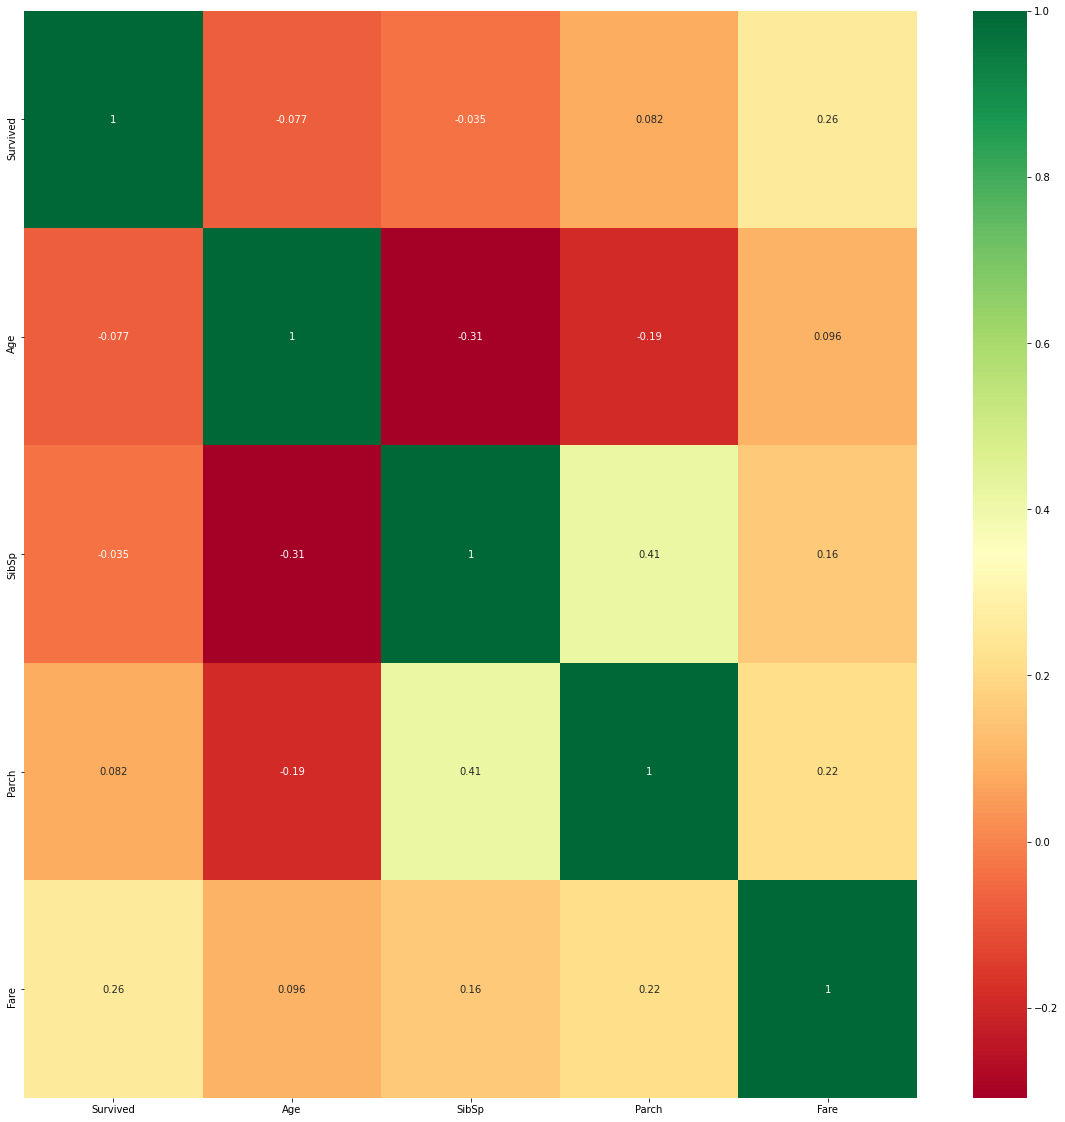

<Figure size 432x288 with 0 Axes>

In [11]:
heatMap(df_train)

Not much information from this heatmap. I mean no strong correlation detected.

In [12]:
def seg_variables (data : pd.DataFrame) -> tuple:
	cat = [var for var in data.columns if (data[var].dtype == 'O')]
	num = [var for var in data.columns if (var not in cat)]
	return (cat, num)


def handle_missing_value (data : pd.DataFrame, 
						cStrat = "most_frequent", nStrat = "median"):
	# feature generation
	cat, num = seg_variables (data)
	for col in data.columns:
		if (data[col].isnull().sum() != 0):
			data[col + "_isnull"] = data[col].isnull()


In [13]:
X = df_train.drop('Survived', axis = 1)
Y = df_train['Survived']
custom_pipeline = handle_missing_value(X)
print ("\n\nafter processing\m" , X.isnull().sum())



after processing\m Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Age_isnull           0
Cabin_isnull         0
Embarked_isnull      0
dtype: int64


In [14]:
cat, num = seg_variables(X)
for col in cat:
    print (col , "\n", X[col].describe(), "\n")

Pclass 
 count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: object 

Sex 
 count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object 

Ticket 
 count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object 

Cabin 
 count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object 

Embarked 
 count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object 



In [15]:
d = {}
for i in range(df_train.shape[0]):
        key = df_train.loc[i, 'Ticket']
        if (key not in d):
           d[key] = 0
        d[key] += df_train.loc[i, 'Survived']
for key in d:
    print (key, " => ", d[key])

A/5 21171  =>  0
PC 17599  =>  1
STON/O2. 3101282  =>  1
113803  =>  1
373450  =>  0
330877  =>  0
17463  =>  0
349909  =>  0
347742  =>  3
237736  =>  1
PP 9549  =>  2
113783  =>  1
A/5. 2151  =>  0
347082  =>  0
350406  =>  0
248706  =>  1
382652  =>  0
244373  =>  1
345763  =>  0
2649  =>  1
239865  =>  0
248698  =>  1
330923  =>  1
113788  =>  1
347077  =>  3
2631  =>  0
19950  =>  2
330959  =>  1
349216  =>  0
PC 17601  =>  0
PC 17569  =>  2
335677  =>  1
C.A. 24579  =>  0
PC 17604  =>  1
113789  =>  1
2677  =>  1
A./5. 2152  =>  0
345764  =>  0
2651  =>  2
7546  =>  0
11668  =>  0
349253  =>  0
SC/Paris 2123  =>  2
330958  =>  1
S.C./A.4. 23567  =>  0
370371  =>  0
14311  =>  1
2662  =>  0
349237  =>  0
3101295  =>  0
A/4. 39886  =>  0
PC 17572  =>  3
2926  =>  1
113509  =>  0
19947  =>  1
C.A. 31026  =>  1
2697  =>  0
C.A. 34651  =>  2
CA 2144  =>  0
2669  =>  0
113572  =>  2
36973  =>  1
347088  =>  0
PC 17605  =>  0
2661  =>  2
C.A. 29395  =>  1
S.P. 3464  =>  0
3101281  =>  1

In [16]:
ls = set()
for key in d:
    for words in key.split(' '):
        if (words.isnumeric() == False):
            ls.add(words)

ls.remove('2.')
print(ls)

{'W/C', 'LINE', 'CA', 'S.C./A.4.', 'Fa', 'SO/C', 'CA.', 'F.C.', 'C', 'F.C.C.', 'S.O./P.P.', 'S.W./PP', 'SC', 'SOTON/O2', 'Basle', 'S.O.C.', 'P/PP', 'A4.', 'S.O.P.', 'WE/P', 'SC/Paris', 'S.P.', 'A./5.', 'SOTON/O.Q.', 'STON/O', 'PP', 'PC', 'STON/O2.', 'A.5.', 'A/4', 'SCO/W', 'SOTON/OQ', 'SC/AH', 'C.A./SOTON', 'S.C./PARIS', 'SW/PP', 'SC/PARIS', 'A/S', 'W.E.P.', 'A/4.', 'W./C.', 'A/5.', 'A/5', 'C.A.'}


In [17]:
import math
def generateFeature(X) -> None:
    Ticket_char = list()
    Ticket_isNum = list()
    for x in X['Ticket']:
        s = "";
        for words in x.split(' '):
            if (words.isnumeric() == False):
                s = words
                break
        Ticket_char.append(s)
        Ticket_isNum.append(1 if s == "" else 0)
    
    
    assert (len(Ticket_char) == len(Ticket_isNum) and len(Ticket_char) == X.shape[0])
    assert (len(Ticket_char) == len(Ticket_isNum) and len(Ticket_char) == X.shape[0])
    X['ticket_char'] = Ticket_char
    X['ticket_isnum'] = Ticket_isNum

def genCabin(X) -> None:
    Cabin_cat = list()
    for x in X['Cabin']:
        Cabin_cat.append(x[0])
    X['cabin_cat'] = Cabin_cat

In [18]:
generateFeature(X)

In [19]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isnull,Cabin_isnull,Embarked_isnull,ticket_char,ticket_isnum
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,A/5,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,PC,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,STON/O2.,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,False,False,False,,1
4,3,male,35.0,0,0,373450,8.0500,NaN,S,False,True,False,,1


In [20]:
print (X[cat].describe())

       Pclass   Sex  Ticket    Cabin Embarked
count     891   891     891      204      889
unique      3     2     681      147        3
top         3  male  347082  B96 B98        S
freq      491   577       7        4      644


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    object 
 1   Sex              891 non-null    object 
 2   Age              714 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Ticket           891 non-null    object 
 6   Fare             891 non-null    float64
 7   Cabin            204 non-null    object 
 8   Embarked         889 non-null    object 
 9   Age_isnull       891 non-null    bool   
 10  Cabin_isnull     891 non-null    bool   
 11  Embarked_isnull  891 non-null    bool   
 12  ticket_char      891 non-null    object 
 13  ticket_isnum     891 non-null    int64  
dtypes: bool(3), float64(2), int64(3), object(6)
memory usage: 79.3+ KB


In [22]:
from sklearn.impute import SimpleImputer

cat_impute = SimpleImputer(strategy = "most_frequent")
num_impute = SimpleImputer(strategy = "median")

cImputer = cat_impute.fit(X[cat])
nImputer = num_impute.fit(X[num])

X[cat] = pd.DataFrame(cImputer.transform(X[cat]))
X[num] = pd.DataFrame(nImputer.transform(X[num]))
genCabin(X)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    object 
 1   Sex              891 non-null    object 
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    float64
 4   Parch            891 non-null    float64
 5   Ticket           891 non-null    object 
 6   Fare             891 non-null    float64
 7   Cabin            891 non-null    object 
 8   Embarked         891 non-null    object 
 9   Age_isnull       891 non-null    float64
 10  Cabin_isnull     891 non-null    float64
 11  Embarked_isnull  891 non-null    float64
 12  ticket_char      891 non-null    object 
 13  ticket_isnum     891 non-null    int64  
 14  cabin_cat        891 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 104.5+ KB


In [24]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isnull,Cabin_isnull,Embarked_isnull,ticket_char,ticket_isnum,cabin_cat
0,3,male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S,0.0,1.0,0.0,A/5,0,B
1,1,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,PC,0,C
2,3,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S,0.0,1.0,0.0,STON/O2.,0,B
3,1,female,35.0,1.0,0.0,113803,53.1000,C123,S,0.0,0.0,0.0,,1,C
4,3,male,35.0,0.0,0.0,373450,8.0500,B96 B98,S,0.0,1.0,0.0,,1,B


In [25]:
X.isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Age_isnull         0
Cabin_isnull       0
Embarked_isnull    0
ticket_char        0
ticket_isnum       0
cabin_cat          0
dtype: int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    object 
 1   Sex              891 non-null    object 
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    float64
 4   Parch            891 non-null    float64
 5   Ticket           891 non-null    object 
 6   Fare             891 non-null    float64
 7   Cabin            891 non-null    object 
 8   Embarked         891 non-null    object 
 9   Age_isnull       891 non-null    float64
 10  Cabin_isnull     891 non-null    float64
 11  Embarked_isnull  891 non-null    float64
 12  ticket_char      891 non-null    object 
 13  ticket_isnum     891 non-null    int64  
 14  cabin_cat        891 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 104.5+ KB


In [27]:
cat, num = seg_variables(X)
for col in num:
    X[col] = X[col].astype(np.int)

In [28]:
from catboost import CatBoostClassifier
params  = {
    'cat_features' : np.where(X.dtypes == 'O')[0],
    'eval_metric' : 'AUC',
    'task_type' : 'CPU',
    'verbose' : 1000,
    'random_seed' : 32,
    'thread_count' : -1,
    'loss_function' : 'Logloss',
}
grid = {
    'iterations' : [100, 200, 300, 400],
    'depth' : [x for x in range(1, 14, 2)],
    'min_data_in_leaf' : [x for x in range(1, 7)],
}


In [29]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Age_isnull', 'Cabin_isnull', 'Embarked_isnull',
       'ticket_char', 'ticket_isnum', 'cabin_cat'],
      dtype='object')

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Pclass           891 non-null    object
 1   Sex              891 non-null    object
 2   Age              891 non-null    int64 
 3   SibSp            891 non-null    int64 
 4   Parch            891 non-null    int64 
 5   Ticket           891 non-null    object
 6   Fare             891 non-null    int64 
 7   Cabin            891 non-null    object
 8   Embarked         891 non-null    object
 9   Age_isnull       891 non-null    int64 
 10  Cabin_isnull     891 non-null    int64 
 11  Embarked_isnull  891 non-null    int64 
 12  ticket_char      891 non-null    object
 13  ticket_isnum     891 non-null    int64 
 14  cabin_cat        891 non-null    object
dtypes: int64(8), object(7)
memory usage: 104.5+ KB


In [31]:
params['cat_features']

array([ 0,  1,  5,  7,  8, 12, 14])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, random_state = 45)

In [33]:
model = CatBoostClassifier(**params)
model.grid_search(grid, X_train, y_train, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7916667	best: 0.7916667 (0)	total: 75.2ms	remaining: 7.45s
99:	test: 0.8797980	best: 0.8945707 (19)	total: 190ms	remaining: 0us

bestTest = 0.8945707071
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8945707	best: 0.8945707 (0)	total: 309ms	remaining: 51.5s
0:	test: 0.7916667	best: 0.7916667 (0)	total: 3.53ms	remaining: 702ms
199:	test: 0.8856061	best: 0.8945707 (19)	total: 89.7ms	remaining: 0us

bestTest = 0.8945707071
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8945707	best: 0.8945707 (0)	total: 403ms	remaining: 33.4s
0:	test: 0.7916667	best: 0.7916667 (0)	total: 889us	remaining: 266ms
299:	test: 0.8895202	best: 0.8945707 (19)	total: 173ms	remaining: 0us

bestTest = 0.8945707071
bestIteration = 19

Metric AUC is not calculated on train by

KeyboardInterrupt: 

In [ ]:
model.best_score_

{'learn': {'Logloss': 0.17891971308456048},
 'validation': {'Logloss': 0.3432278933143525, 'AUC': 0.9220601237842617}}